## Notebook to investigate how to plot orbits in different ways:
- 2d
- 3d
- groundtrack

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from astropy.time import Time, TimeDelta
from astropy import units as u
from astropy.coordinates import (
    GCRS,
    ITRS,
    CartesianDifferential,
    CartesianRepresentation,
    SphericalRepresentation,
)

from poliastro.bodies import Earth, Moon
from poliastro.twobody import Orbit

from poliastro.plotting import StaticOrbitPlotter, OrbitPlotter3D

from poliastro.earth.plotting import GroundtrackPlotter

In [2]:
# EARTH CONSTANTS
earth_R = Earth.R.to(u.km)  # Earth's radius (km)
k = Earth.k.to(u.km**3 / u.s**2)  # GM constant for earth

# CHESS PATHFINDER 1 ORBITAL PARAMETERS
attractor = Earth
alt = 550 * u.km
inc = 97.59254364 * u.deg
a = earth_R + alt
ecc = 0.0 * u.one  # Circular orbit
raan = 0.0 * u.deg
argp = 0.0 * u.deg
nu = 0.0 * u.deg
epoch = Time("2027-11-01 12:00:00.000", format="iso", scale="utc")

# Define orbit, time units and number of timesteps
orbit = Orbit.heliosynchronous(
    attractor=attractor,
    a=a,
    ecc=ecc,
    # inc = inc,
    raan=raan,
    argp=argp,
    nu=nu,
    epoch=epoch,  # will convert to tdb (Barycentric dynamical time)
)
print("Orbital Period:", orbit.period)
print("Orbit characteristics:", orbit)

# load a trajectory
file_name = "1day.npy"
traj = np.load("propagation_results/position_vel_" + file_name)
rr = traj[:, :3]
vv = traj[:, 3:]

epochs = np.load("propagation_results/epochs_" + file_name, allow_pickle=True)

Orbital Period: 5738.992317998695 s
Orbit characteristics: 6928 x 6928 km x 97.6 deg (GCRS) orbit around Earth (♁) at epoch 2027-11-01 12:01:09.183 (TDB)


## 1. Plot an orbit

### A. Basic plotting from poliastro without any custom parameter

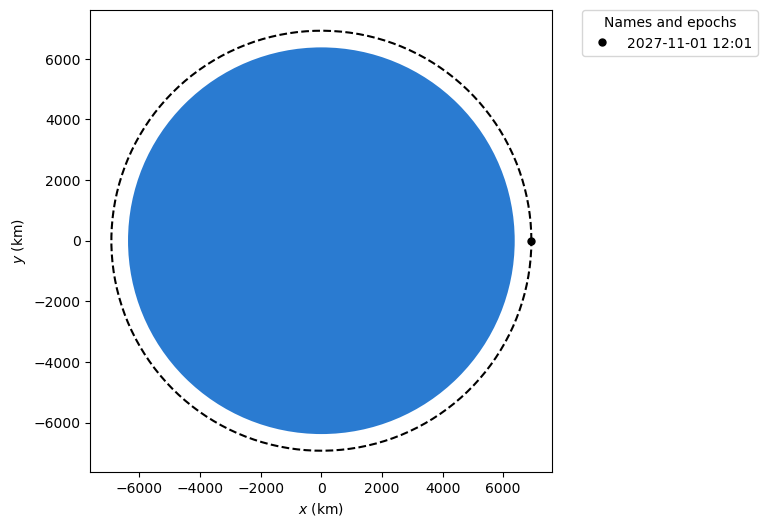

In [370]:
plotter = StaticOrbitPlotter()
plotter.plot(orbit, color="k")
plt.show()

### B. 3D plotting with plotly
Many custom parameters were investigated to produce nice plots

In [492]:
# fig = orbit.plot(interactive=True, use_3d=True, label="initial orbit")
plotter = OrbitPlotter3D()
fig = plotter.plot(orbit, label="cubeSat")

fig.update_layout(
    title={
        "text": "CHESS 1 Initial Orbit",
        # 'font': dict(size=20, family="Courier New"),
        "y": 0.92,  # Adjust this value to move the title down (between 0 and 1)
        "x": 0.5,  # Center the title horizontally
        "xanchor": "center",  # Anchor the title to the center
        "yanchor": "top",  # Anchor the title to the top
    },
    margin=dict(l=0, r=0, b=0, t=0),  # Set margins to zero
    height=400,
    width=450,
    # Option 1: grid and tick values but no tick line, possibility to turn background to transparent
    scene=dict(
        xaxis=dict(
            # backgroundcolor="rgba(0, 0, 0, 0)",  # Transparent background
            showgrid=True,
            gridcolor="grey",
            zerolinecolor="grey",
            showbackground=True,
            title="<i>X</i> (km)",
            ticks="",
            showticklabels=True,
        ),
        yaxis=dict(
            # backgroundcolor="rgba(0, 0, 0, 0)",  # Transparent background
            showgrid=True,
            gridcolor="grey",
            zerolinecolor="grey",
            showbackground=True,
            title="<i>Y</i> (km)",
            ticks="",
            showticklabels=True,
        ),
        zaxis=dict(
            # backgroundcolor="rgba(0, 0, 0, 0)",  # Transparent background
            showgrid=True,
            gridcolor="grey",
            zerolinecolor="grey",
            showbackground=True,
            title="<i>Z</i> (km)",
            ticks="",
            showticklabels=True,
        ),
        camera=dict(eye=dict(x=1.8, y=-1.3, z=0.2)),
    ),
    # Option 2: only wackground walls with different colors to keep 3d effect, and z, y , z labels
    # scene=dict(
    #     xaxis=dict(
    #         backgroundcolor="rgba(105,132,163, 1)",
    #         showgrid=False,
    #         zeroline = False,
    #         showbackground=True,
    #         title='X',
    #         ticks='',
    #         showticklabels=False,
    #     ),
    #     yaxis=dict(
    #         backgroundcolor="rgba(138,164,197, 1)",
    #         showgrid=False,
    #         zeroline = False,
    #         showbackground=True,
    #         title='Y',
    #         ticks='',
    #         showticklabels=False,
    #     ),
    #     zaxis=dict(
    #         backgroundcolor="rgba(171,196,231, 1)",
    #         showgrid=False,
    #         zeroline = False,
    #         showbackground=True,
    #         title='Z',
    #         ticks='',
    #         showticklabels=False,
    #     ),
    #     camera=dict(
    #         eye=dict(x=1.8, y=-1.3, z=0.2)
    #     ),
    # ),
    # # Option 3: remove background and axes
    # scene=dict(
    #     xaxis=dict(
    #         visible=False,  # Hide the x-axis
    #     ),
    #     yaxis=dict(
    #         visible=False,  # Hide the y-axis
    #     ),
    #     zaxis=dict(
    #         visible=False,  # Hide the z-axis
    #     ),
    #     camera=dict(
    #         eye=dict(x=1.5, y=-1, z=0.1)
    #     ),
    # ),
    # # How to change camera angle ?
    # scene = dict(
    #     camera=dict(
    #         # eye=dict(x=0.8, y=0.8, z=0.8)    # Adjust these values to zoom in/out and change perspective
    #         eye=dict(x=0, y=0, z=3) # view from above
    #         # eye=dict(x=3, y=0, z=0)  # View from the side
    #         # eye=dict(x=1, y=1, z=1) # Balanced view from a corner
    #     ),
    # ),
    legend=dict(
        title="Legend:",
        orientation="h",  # Horizontal legend
        yanchor="bottom",  # Anchor to the bottom
        y=-0.1,  # Position it below the plot (adjust as needed)
        xanchor="center",  # Center the legend
        x=0.5,  # Center the legend horizontally
    ),
)

for trace in fig.data:
    if isinstance(trace, go.Scatter3d):
        trace.line.color = "black"
        trace.line.width = 7
        trace.line.dash = "solid"
        trace.showlegend = True
        trace.name = "initial orbit"
    elif isinstance(trace, go.Surface):  # Assuming Earth is a Surface
        print(trace.name)
        if trace.name == "Earth":
            trace.colorscale = [[0, "mediumblue"], [1, "mediumblue"]]
        else:
            trace.colorscale = [[0, "red"], [1, "red"]]
            trace.showlegend = True
            trace.name = "cubeSat"
    elif isinstance(trace, go.Mesh3d):  # If Earth is a Mesh3d instead
        trace.color = "green"


fig.show()

Earth
2027-11-01 12:01 (cubeSat)
Earth


### C. 2D plotting with Plotly

In [502]:
fig = orbit.plot(interactive=True)

fig.update_layout(
    title={
        "text": "CHESS 1 Initial Orbit",
        "y": 0.95,  # Adjust this value to move the title down (between 0 and 1)
        "x": 0.5,  # Center the title horizontally
        "xanchor": "center",  # Anchor the title to the center
        "yanchor": "top",  # Anchor the title to the top
    },
    margin=dict(l=0, r=0, b=60, t=60),  # Adjust margins for centering
    height=400,  # Set the height of the figure
    width=450,  # Set the width of the figure
    legend=dict(
        title="Legend:",
        orientation="h",  # Horizontal legend
        yanchor="bottom",  # Anchor to the bottom
        y=-0.3,  # Position it below the plot (adjust as needed)
        xanchor="center",  # Center the legend
        x=0.5,  # Center the legend horizontally
    ),
    xaxis=dict(
        title="<i>X</i> (km)",
        zerolinewidth=1,
        range=[-8000, 8000],  # Adjust this range for the x-axis
    ),
    yaxis=dict(
        # gridcolor='grey',
        # zerolinecolor='grey',
        title="<i>Y</i> (km)",
        zerolinewidth=1,
        range=[-8000, 8000],  # Adjust this range for the y-axis
        title_standoff=10,
    ),
)

fig.data[0].line.dash = "solid"  # Change from 'dash' to 'solid'
fig.data[0].line.color = "black"  # Change color to black
fig.data[0].line.width = 2
fig.data[0].showlegend = True
fig.data[0].name = "initial orbit"
fig.data[1].marker.color = "red"  # Change marker color to red

# Update the central circle properties
fig.layout.shapes[1].fillcolor = (
    "mediumblue"  # Set the fill color of the second circle shape to green
)
fig.layout.shapes[1].line.color = (
    "darkblue"  # Set the line color of the second circle shape to dark green
)

fig.show()

### D. 2D plotting with matplotlib
Not very practical since it does not allow to update the central body earth (for example the color).
It can be done but the marker size has to be set manually which is very inconvenient

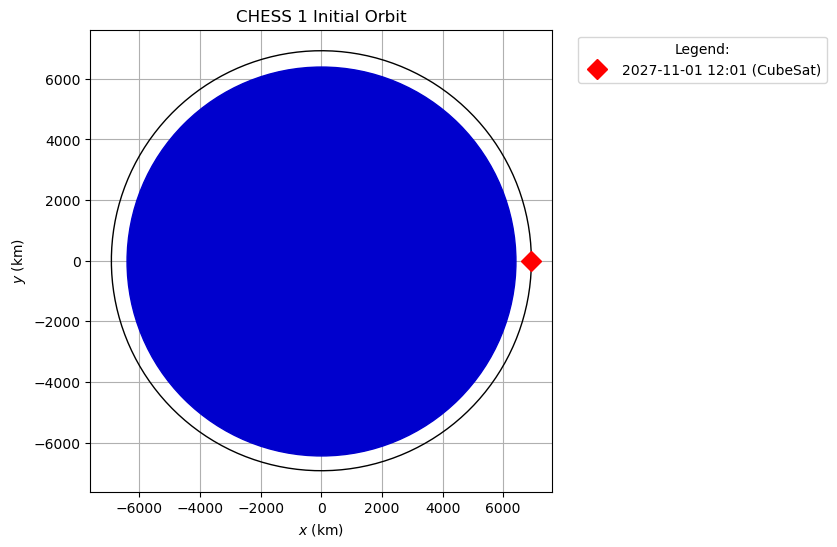

In [373]:
plotter = StaticOrbitPlotter()

# Option 1:specify frame based on an orbit
plotter.set_orbit_frame(orbit)

# Option 2: specify attractor AND frame based on other body (example, moon)
# plotter.set_attractor(Earth)
# plotter.set_body_frame(Moon)

plots_traj, plots_pos = plotter.plot(orbit, label="CubeSat", color="red")
plots_traj.set_linestyle("-")  # solid line
plots_traj.set_color("k")
plots_traj.set_linewidth(1)
plots_pos.set_marker("D")  # H: Hexagon, *: star, D: diamond
plots_pos.set_fillstyle("full")
plots_pos.set_color("r")
plots_pos.set_markersize(10)

earth_position = [0, 0]  # Assuming Earth is at the origin in this frame
plt.plot(earth_position[0], earth_position[1], "o", color="mediumblue", markersize=280)

plt.grid(zorder=0)
plt.title("CHESS 1 Initial Orbit", zorder=3)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", title="Legend:")
plt.show()

## 2. Plot a trajectory

### A. Replace the orbit points (that are used only to generate the frame) with the desired trajectory
- This is "kinda" cheating because the orbit here is only a dummy variable used to generate the 3D plot
- This was the first way I managed to curtomize trajectories, however the next way was ultimately found and is better

In [503]:
# 2 ways to do it:
# first way:
plotter = OrbitPlotter3D()
fig = plotter.plot(orbit)

# secnd way
# fig = orbit.plot(interactive=True, use_3d=True)

# Customizing the title, axis labels, and background color
fig.update_layout(
    title={
        "text": "CHESS 1 Initial Orbit",
        # 'font': dict(size=20, family="Courier New"),
        "y": 0.92,  # Adjust this value to move the title down (between 0 and 1)
        "x": 0.5,  # Center the title horizontally
        "xanchor": "center",  # Anchor the title to the center
        "yanchor": "top",  # Anchor the title to the top
    },
    margin=dict(l=0, r=0, b=0, t=0),  # Set margins to zero
    height=400,
    width=450,
    scene=dict(
        xaxis=dict(
            # backgroundcolor="rgba(0, 0, 0, 0)",  # Transparent background
            showgrid=True,
            gridcolor="grey",
            zerolinecolor="grey",
            showbackground=True,
            title="<i>X</i> (km)",
            ticks="",
            showticklabels=True,
        ),
        yaxis=dict(
            # backgroundcolor="rgba(0, 0, 0, 0)",  # Transparent background
            showgrid=True,
            gridcolor="grey",
            zerolinecolor="grey",
            showbackground=True,
            title="<i>Y</i> (km)",
            ticks="",
            showticklabels=True,
        ),
        zaxis=dict(
            # backgroundcolor="rgba(0, 0, 0, 0)",  # Transparent background
            showgrid=True,
            gridcolor="grey",
            zerolinecolor="grey",
            showbackground=True,
            title="<i>Z</i> (km)",
            ticks="",
            showticklabels=True,
        ),
        camera=dict(eye=dict(x=1.8, y=-1.3, z=0.2)),
    ),
)

for trace in fig.data:
    if isinstance(trace, go.Scatter3d):
        trace.line.color = "black"
        trace.line.width = 0.1
        trace.line.dash = "solid"
        # IMPORTANT CHANGE IS HERE: add trajectory to the plot
        trace.x = rr[:, 0]
        trace.y = rr[:, 1]
        trace.z = rr[:, 2]

    elif isinstance(trace, go.Surface):  # Assuming Earth is a Surface
        if trace.name == "Earth":
            trace.colorscale = [
                [0, "mediumblue"],
                [1, "mediumblue"],
            ]  # Make Earth uniformly green
        else:
            trace.colorscale = [[0, "red"], [1, "red"]]
    elif isinstance(trace, go.Mesh3d):  # If Earth is a Mesh3d instead
        trace.color = "green"

fig.show()

### C. Use StaticOrbitPlotter3D (3D plot)
- Super practical, can add orbits and trajectories together
- needs some manual handling in the last part in order to set the color, titles well

In [6]:
coords = CartesianRepresentation(rr[:, 0] << u.km, rr[:, 1] << u.km, rr[:, 2] << u.km)
title_trajectory = "trajectory (1 year)"

plotter = OrbitPlotter3D()
fig = plotter.plot(orbit)
fig = plotter.plot_trajectory(coords, label=title_trajectory)

# secnd way
# fig = orbit.plot(interactive=True, use_3d=True)

# Customizing the title, axis labels, and background color
fig.update_layout(
    title={
        "text": "CHESS 1",
        # 'font': dict(size=20, family="Courier New"),
        "y": 0.92,  # Adjust this value to move the title down (between 0 and 1)
        "x": 0.5,  # Center the title horizontally
        "xanchor": "center",  # Anchor the title to the center
        "yanchor": "top",  # Anchor the title to the top
    },
    margin=dict(l=0, r=0, b=0, t=0),  # Set margins to zero
    height=400,
    width=450,
    scene=dict(
        xaxis=dict(
            # backgroundcolor="rgba(0, 0, 0, 0)",  # Transparent background
            showgrid=True,
            gridcolor="grey",
            zerolinecolor="grey",
            showbackground=True,
            title="<i>X</i> (km)",
            ticks="",
            showticklabels=True,
        ),
        yaxis=dict(
            # backgroundcolor="rgba(0, 0, 0, 0)",  # Transparent background
            showgrid=True,
            gridcolor="grey",
            zerolinecolor="grey",
            showbackground=True,
            title="<i>Y</i> (km)",
            ticks="",
            showticklabels=True,
        ),
        zaxis=dict(
            # backgroundcolor="rgba(0, 0, 0, 0)",  # Transparent background
            showgrid=True,
            gridcolor="grey",
            zerolinecolor="grey",
            showbackground=True,
            title="<i>Z</i> (km)",
            ticks="",
            showticklabels=True,
        ),
        camera=dict(eye=dict(x=1.8, y=-1.3, z=0.2)),
    ),
    legend=dict(
        title="Legend:",
        orientation="h",  # Horizontal legend
        yanchor="bottom",  # Anchor to the bottom
        y=-0.1,  # Position it below the plot (adjust as needed)
        xanchor="center",  # Center the legend
        x=0.5,  # Center the legend horizontally
    ),
)

for trace in fig.data:
    if isinstance(trace, go.Scatter3d):
        if trace.name == title_trajectory:
            trace.line.color = "black"
            trace.line.width = 0.1
            trace.line.dash = "solid"
            trace.showlegend = True
        else:
            trace.line.color = "red"
            trace.line.width = 7
            trace.line.dash = "solid"
            trace.showlegend = True
            trace.name = "initial orbit"
            # trace.name = "initial orbit"
    elif isinstance(trace, go.Surface):  # Assuming Earth is a Surface
        if trace.name == "Earth":
            trace.colorscale = [[0, "blue"], [1, "blue"]]  # Make Earth uniformly green
        else:
            trace.colorscale = [[0, "red"], [1, "red"]]
    elif isinstance(trace, go.Mesh3d):  # If Earth is a Mesh3d instead
        trace.color = "green"

fig.show()

### B. Use StaticOrbitPlotter (2D plot)
- Remember that a 2d plot is limited. When the orbit changes RAAN for instance, it does not make sense to plot in 2D
- Therefore, we only plot a trajectory of 1 day

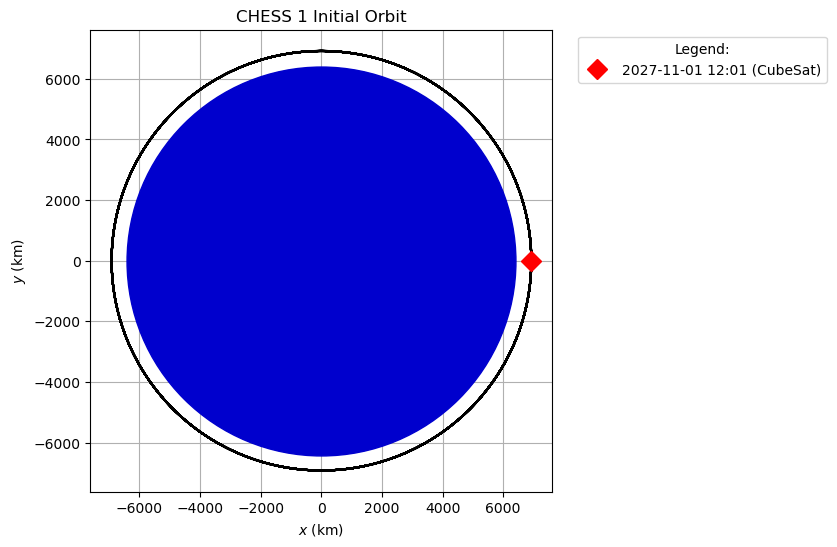

In [376]:
# load a trajectory
traj_1day = np.load("propagation_results/trajectory_1day.npy")
rr_1day = traj_1day[:, :3]
coords_1day = CartesianRepresentation(
    rr_1day[:, 0] << u.km, rr_1day[:, 1] << u.km, rr_1day[:, 2] << u.km
)

plotter = StaticOrbitPlotter()

# ADD THE TRAJECTORY!
plotter.set_orbit_frame(orbit)
plotter.set_attractor(Earth)
plotter.plot_trajectory(coords_1day, color="black")


plots_traj, plots_pos = plotter.plot(orbit, label="CubeSat", color="red")
plots_traj.set_linestyle("-")  # solid line
plots_traj.set_color("k")
plots_traj.set_linewidth(1)
plots_pos.set_marker("D")  # H: Hexagon, *: star, D: diamond
plots_pos.set_fillstyle("full")
plots_pos.set_color("r")
plots_pos.set_markersize(10)

earth_position = [0, 0]  # Assuming Earth is at the origin in this frame
plt.plot(earth_position[0], earth_position[1], "o", color="mediumblue", markersize=280)

plt.grid(zorder=0)
plt.title("CHESS 1 Initial Orbit", zorder=3)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", title="Legend:")
plt.show()

## 3. Plot groundtracks!

In [5]:
# For building geo traces
gp = GroundtrackPlotter()

# Add ground station
STATION = [46.31, 6.38] * u.deg  # [LAT LON]
gp.add_trace(
    go.Scattergeo(
        lat=STATION[0],
        lon=STATION[-1],
        name="Lausanne",
        marker={"color": "red"},
        showlegend=True,
    )
)

# Add satellite groundtrack
raw_xyz = CartesianRepresentation(rr, xyz_axis=-1)
raw_obstime = epochs
gcrs_xyz = GCRS(
    raw_xyz, obstime=raw_obstime, representation_type=CartesianRepresentation
)
itrs_xyz = gcrs_xyz.transform_to(
    ITRS(obstime=raw_obstime)
)  # Converts raw coordinates to ITRS ones.
itrs_latlon = itrs_xyz.represent_as(SphericalRepresentation)
gp.add_trace(
    go.Scattergeo(
        lat=itrs_latlon.lat.to(u.deg),
        lon=itrs_latlon.lon.to(u.deg),
        mode="lines",
        name="CHESS 1",
        line={"color": "purple", "width": 1},
    )
)

# Customize plots
gp.update_layout(
    title={
        "text": "Grountrack of CHESS 1 (1 day)",
        "y": 0.92,  # Adjust this value to move the title down (between 0 and 1)
        "x": 0.5,  # Center the title horizontally
        "xanchor": "center",  # Anchor the title to the center
        "yanchor": "top",  # Anchor the title to the top
    },
    margin=dict(l=10, r=10, b=0, t=50),  # Set margins to zero
    height=500,
    width=800,
    legend=dict(
        title="Legend:",
        orientation="h",  # Horizontal legend
        yanchor="bottom",  # Anchor to the bottom
        y=-0,  # Position it below the plot (adjust as needed)
        xanchor="center",  # Center the legend
        x=0.5,  # Center the legend horizontally
    ),
)
gp.fig.show()

gp.update_geos(projection_type="orthographic")
gp.fig.show()

[(6928.1366    ,    0.        ,    0.        ),
 (6913.17366215,  -60.08915522,  450.78952197),
 (6868.35008139, -119.91876402,  899.62657303), ...,
 (6653.26298536, -142.19128335, 1925.20702038),
 (6512.2385361 , -201.74890762, 2353.68063908),
 (6343.09875189, -260.43552855, 2771.96480953)] 
<GCRS Coordinate (obstime=['2027-11-01 12:01:09.183' '2027-11-01 12:02:09.183'
 '2027-11-01 12:03:09.183' ... '2027-11-02 11:59:09.183'
 '2027-11-02 12:00:09.183' '2027-11-02 12:01:09.183'], obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (x, y, z) [dimensionless]
    [(6928.1366    ,    0.        ,    0.        ),
     (6913.17366215,  -60.08915522,  450.78952197),
     (6868.35008139, -119.91876402,  899.62657303), ...,
     (6653.26298536, -142.19128335, 1925.20702038),
     (6512.2385361 , -201.74890762, 2353.68063908),
     (6343.09875189, -260.43552855, 2771.96480953)]>
